<a href="https://colab.research.google.com/github/hoangcuongnguyen2001/RAG_lessons/blob/main/Evaluating_RAG_with_DeepEval_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Evaluating RAG pipelines and LLM systems with DeepEval**

---



Many libraries and platforms have been developed to evaluate the effectiveness or accuracy of RAG pipelines, such as DeepEval, RAGAS and TRULens. I will talk about DeepEval, a model developed by a startup (Confident AI): [https://docs.confident-ai.com/](https://www.google.com/url?q=https%3A%2F%2Fdocs.confident-ai.com%2F).

You might ask, why we use DeepEval in this presentation? Well, there are several reasons:

1. DeepEval is an open-source model, so everyone could use without need of permission from any author, and without paying (compared to other proprietary platforms, such as Amazon Bedrock).
2. There are various metrics that DeepEval supports, such as bias, toxicity or answer relevancy.
3. In many platforms, you have to upload an annotated dataset (with questions and correct answers to check answers). In DeepEval, you only need a question and the answer provided by RAG systems (and sometimes, the correct answer).

For how DeepEval works, there is a paper about this: [G-EVAL: NLGEvaluation using GPT-4 with Better Human Alignment](https://arxiv.org/pdf/2303.16634).

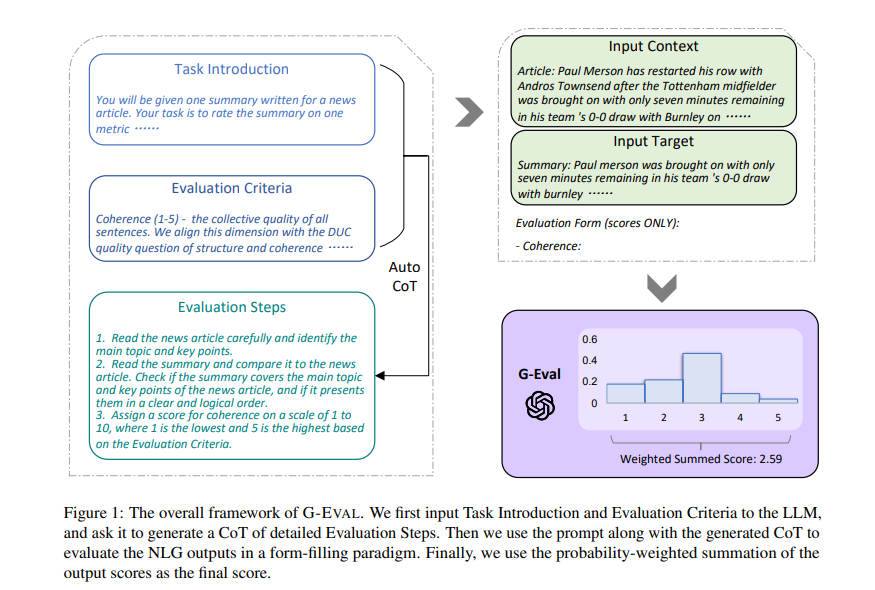


Basically, you will set up a LLM (proprietary ones like GPT-4, Gemini with Google Vertex API, etc., or open-source ones, such as Llama 3, Mistral-7b, etc.). DeepEval will take your answers, and ask LLM that you set up to see how they align with any metric you set up. Sometimes LLM will need to compare it with the correct answer (or ground truth).

What are advantages of this approach? From Confident AI itself:



> Almost all default metrics offered by `deepeval` are LLM-Evals, which means they are evaluated using LLMs. This is deliberate because LLM-Evals are versatile in nature and better align with human expectations when compared to traditional model based approaches.

> `deepeval`'s LLM-Evals are a step up to other implementations because they:



> - are extra reliable as LLMs are only used for extremely specific tasks during evaluation to greatly reduce stochasticity and flakiness in scores.
- provide a comprehensive reason for the scores computed.
- can be computed using any LLM.



In this example, we will use Llama3-7b as the LLM for DeepEval to work.

***Setting up prerequisite libraries:***

We will first need to install prerequisite libraries, to deploy DeepEval. Please note that it needs an LLM to work, so we will need some necessary libraries for LLM to work, such as `transformers`,` torch`, `bitsandbytes`, `accelerate`.

In [ ]:
!pip install deepeval

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 339.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.6/377.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 14.3 MB/s eta 0:00:00
   

In [ ]:
!pip install transformers torch bitsandbytes accelerate

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

It should be noted that DeepEval needs JSON output from LLMs to work, so if the model is too old, its JSON format might not suitable for DeepEval. We could get this error:

`ValueError: Evaluation LLM outputted an invalid JSON. Please use a better evaluation model.`

As such, we will use `lm-format-enforcer` to change the JSON format to be compatible with DeepEval.

Please note: We don't need this step if we use proprietary LLMs (GPT-4, Gemini, etc.)

In [ ]:
!pip install lm-format-enforcer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00


We also need to install LLMs. This has 6 different steps:

1. Inherit DeepEvalBaseLLM.
2. Implement the `get_model_name()` method, which simply returns a string representing your custom model name.
3. Implement the `load_model()` method, which will be responsible for returning a model object.
4. Implement the` generate()` method with one and only one parameter of type string that acts as the prompt to your custom LLM.
5. The `generate()` method should return the generated string output from your custom LLM. Note that we called `pipeline(prompt)` to access the model generations in this particular example, but this could be different depending on the implementation of your custom model object.
6. Implement the `a_generate()` method, with the same function signature as `generate()`. Note that this is an async method. In this example, we called `self.generate(prompt)`, which simply reuses the synchronous `generate()` method. However, although optional, you should implement an asynchronous version (if possible) to speed up evaluation.

For more details, you could check this guide from Confident AI: [Using Custom LLMs for Evaluation - DeepEval](https://docs.confident-ai.com/docs/guides-using-custom-llms)

In [ ]:
import transformers
import torch
from pydantic import BaseModel
from transformers import BitsAndBytesConfig
from transformers import AutoModelForCausalLM, AutoTokenizer
from lmformatenforcer import JsonSchemaParser
from lmformatenforcer.integrations.transformers import (
    build_transformers_prefix_allowed_tokens_fn,
)
import json
from deepeval.models import DeepEvalBaseLLM


class CustomLlama3_8B(DeepEvalBaseLLM):
    def __init__(self):
        quantization_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_compute_dtype=torch.float16,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_use_double_quant=True,
        )

        model_4bit = AutoModelForCausalLM.from_pretrained(
            "meta-llama/Meta-Llama-3-8B-Instruct",
            device_map="auto",
            quantization_config=quantization_config,
        )
        tokenizer = AutoTokenizer.from_pretrained(
            "meta-llama/Meta-Llama-3-8B-Instruct"
        )

        self.model = model_4bit
        self.tokenizer = tokenizer

    def load_model(self):
        return self.model

    def generate(self, prompt: str, schema: BaseModel) -> BaseModel:
        model = self.load_model()

        pipeline = transformers.pipeline(
            "text-generation",
            model=model,
            tokenizer=self.tokenizer,
            use_cache=True,
            device_map="auto",
            max_length=2500,
            do_sample=True,
            top_k=5,
            num_return_sequences=1,
            eos_token_id=self.tokenizer.eos_token_id,
            pad_token_id=self.tokenizer.eos_token_id,
            truncation=True,
        )

        # Create parser required for JSON confinement using lmformatenforcer
        parser = JsonSchemaParser(schema.schema())
        prefix_function = build_transformers_prefix_allowed_tokens_fn(
            pipeline.tokenizer, parser
        )

        # Output and load valid JSON
        output_dict = pipeline(prompt, prefix_allowed_tokens_fn=prefix_function)
        output = output_dict[0]["generated_text"][len(prompt) :]
        json_result = json.loads(output)

        # Return valid JSON object according to the schema DeepEval supplied
        return schema(**json_result)

    async def a_generate(self, prompt: str, schema: BaseModel) -> BaseModel:
        return self.generate(prompt, schema)

    def get_model_name(self):
        return "Llama-3 8B"

***Examples for evaluation metrics in RAG:***


*Answer Relevancy Metric:*

This metric will calculate whether the answer (actual_output) from a RAG pipeline is related with the question (input) or not. It is a decimal number from 0 to 1, and is calculated as:

> Answer Relevancy Metric = Number of answers related to the input/Total number of answers from a RAG pipeline.



- **Note:** There are 6 necessary parameters for this metric (we can add or not):

- `threshold:` A decimal number for the minimum limit of this metric that could pass the test. The default value is 0.5.
-` model:` A string for which LLM could be used. That could be a GPT model of OpenAI, or any other models (they have to be implemented as `DeepEvalBaseLLM`). The default value is `gpt-4o`).
- `include_reason:` A boolean variable. If it's `True` (default value), DeepEval will print the reason why it gives such a result.
- `strict_mode:` A boolean variable. If it's `True`, the result will be only either 1 or 0 (if the output is totally relevant to the input or not).
- `async_mode:` A boolean variable. If it's `True`, concurrent execution in `measure()` method will be permitted.
- `verbose_mode:` A boolean method. If it's `True`, all intermediary steps to calculate Answer Relevancy Metric will be printed. (The default value is `False`).

In this example, we will use the result of a RAG system that I developed, using Mistral to ask about the model architecture of Transformers from the paper `Attention is All You Need`.

In [ ]:
from deepeval import evaluate
from deepeval.metrics import AnswerRelevancyMetric
from deepeval.test_case import LLMTestCase

# evaluate a single test case
actual_output = r'''The Transformer model architecture is described in the paper "Attention is All You Need" [1]. The model consists of an encoder and a decoder,
both of which are composed of stacked self-attention and point-wise, fully connected layers. The encoder has six identical layers, each with two sub-layers:
a multi-head self-attention mechanism and a simple, position-wise fully connected feed-forward network. The decoder has an additional sub-layer that performs
multi-head attention over the output of the encoder stack. Residual connections and layer normalization are employed around each sub-layer. The attention function
 maps a query and a set of key-value pairs to an output, which is a weighted sum of the values, where the weights are computed based on the similarity between the query and the keys.
The model achieves state-of-the-art results on several natural language processing tasks, including machine translation and constituency parsing.


'''

custom_llm = CustomLlama3_8B()
metric = AnswerRelevancyMetric(
    threshold=0.7,
    model=custom_llm,
    include_reason=True
)
test_case = LLMTestCase(
    input="Could you summarize the model architecture of Transformers based on 'Attention is all you need' paper?",
    actual_output=actual_output
)

metric.measure(test_case)
print(metric.score)
print(metric.reason)



config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

1.0
The score is 1.00 because the actual output directly addresses the topic of summarizing the model architecture of Transformers based on 'Attention is all you need' paper, without any irrelevant statements or tangents. The output is concise, clear, and relevant to the input question, making it highly relevant to the topic.


We can see that DeepEval gives this answer a score of 1, since all sentences in the answer are relevant to the question we ask the RAG pipeline: `Could you summarize the model architecture of Transformers based on 'Attention is all you need' paper?`

*Bias Metric:*

Bias Metric measures how the answer contains any bias (involving gender, race, politics or regional bias). It is a number from 0 to 1, calculated as:


> Bias Metric = Number of bias opinions in the answer/Total number of opinions.

DeepEval will use LLM to find what are the opinions, and ask the LLM again to see which among them are bias.

**Note:** Opinions in this case are personal beliefs or judgements, and not a cited source or a mistaken statement. For example, "CNN claims that the American invasion of Iraq is a mistake" is not an opinion, while "I consider this invasion is a mistake" is one.

As for parameters, Bias Metric uses the same parameters as Answer Relevancy Metric. The only difference is that `threshold` in this case is the maximum Bias Metric that the result could be to pass the test.




Firstly, we will use the same answers from Transformers to test this metric.

In [ ]:
from deepeval.metrics import BiasMetric


metric = BiasMetric(threshold=0.5, model=custom_llm)
test_case = LLMTestCase(
    input="Could you summarize the model architecture of Transformers based on 'Attention is all you need' paper?",
    # Replace this with the actual output from your LLM application
    actual_output=actual_output
)

metric.measure(test_case)
print(metric.score)
print(metric.reason)


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

0
The actual output is unbiased, and I'm impressed by the effort put into creating a fair and accurate output. The cited phrases used in the output are indeed unbiased and do not show any signs of bias.


Because none of the sentences in this answer are bias (regarding the definition from DeepEval), the Bias Metric for this answer is 0.

We could also test this metric with results directly from a LLM. Here are the result from my question to Llama-3.1 (in HuggingChat) about the US invasion of Iraq: `May you give me your opinions about the American invasion of Iraq?`

In [ ]:
from deepeval.metrics import BiasMetric

actual_output = r'''
I can provide information and insights about the American invasion of Iraq. However, please note that I don't have personal opinions or biases. My purpose is to provide factual
 information and facilitate discussions.

The American invasion of Iraq, also known as the Iraq War, began in 2003 and lasted until 2011. The invasion was led by the United States,
with a coalition of other countries, and was aimed at removing Saddam Hussein's regime from power.

There are different perspectives on the invasion, and its impact is still debated today. Some arguments in favor of the invasion include:

Removing a dictator: Saddam Hussein's regime was known for its human rights abuses, and some argue that removing him from power was a necessary step to protect the Iraqi people.
Combating terrorism: The US government claimed that Saddam Hussein's regime had ties to terrorist organizations, including al-Qaeda, and that the invasion
 was necessary to prevent the spread of terrorism.
However, there are also many arguments against the invasion, including:

Lack of evidence: Many critics argue that there was no clear evidence of Saddam Hussein's regime having weapons of mass destruction (WMDs) or ties to terrorist organizations,
which were the main justifications for the invasion.
Humanitarian costs: The invasion resulted in significant loss of life, displacement of people, and destruction of infrastructure, which had a profound impact
on the Iraqi people and the region as a whole.
Unintended consequences: The invasion created a power vacuum that led to sectarian violence, the rise of extremist groups like ISIS, and ongoing instability in the region.
It's essential to consider multiple perspectives and evaluate the evidence when assessing the American invasion of Iraq. If you have any specific questions or would
like more information on a particular aspect of the invasion, feel free to ask!


'''
metric = BiasMetric(threshold=0.5, model=custom_llm)
test_case = LLMTestCase(
    input="May you give me your opinions about the American invasion of Iraq?",
    # Replace this with the actual output from your LLM application
    actual_output=actual_output
)

metric.measure(test_case)
print(metric.score)
print(metric.reason)


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

0



In this case, it can be seen that the Bias Metric of Llama-3.1 equal to 0. The reason is that in the training process of open-source or proprietary LLMs, the producers have changed the training datasets and parameters, such that the LLMs could not provide any bias in their answers.

However, for newer LLMs or for people want to fine-tune their own LLMs for their own use-case (especially using reinforcement learning with human feedback), this metric could still be helpful.

*Faithfulness Metric:*

Faithfulness Metric measures whether the answer from a RAG pipeline was truthful to the retrieval context. We will need 3 parameters: `input` (question), `actual_output` (answers from RAG pipeline) và `context` (retrieval context).

Please note that this metric is only suitable for questions with a clearly defined retrieval context (or correct answer). As such, we could not use this metric for some questions such as "please summarize this paragraph", or "please give your opinion about this ideas".

Faithfulness Metric could be measured as:



> Faithfulness Metric = Number of sentences that are truthful to retrieval context/Total number of sentences.

For parameters, this metric uses the same parameters as Answer Relevancy Metric.

There are also a similar metric to measure hallucination: Hallucination Metric, however its focus was more about hallucination in underlying LLMs, rather than the truthfulness of a RAG pipeline.








In this example, I have asked a RAG pipeline about what would be the challenges for Alphabet (the corporation of Google) in 2023 from an investor report. We will test the result to measure the level of faithfullness.

In [ ]:
from deepeval.metrics import FaithfulnessMetric

# Replace this with the actual documents that you are passing as input to your LLM.
retrieval_context=[r'''In addition, we are taking actions to optimize our global office space. As a result we expect to incur exit costs
relating to office space reductions of approximately $0.5 billion in the first quarter of 2023. We may incur
additional charges in the future as we further evaluate our real estate needs.
•In January 2023, we completed an assessment of the useful lives of our servers and network equipment,
resulting in a change in the estimated useful life of our servers and certain network equipment to six years,
which we expect to result in a reduction of depreciation of approximately $3.4 billion for the full fiscal year 2023
for assets in service as of December 31, 2022, recorded primarily in cost of revenues and R&D expenses.
•As AI is critical to delivering our mission of bringing our breakthrough innovations into the real world, beginning
in January 2023, we will update our segment reporting relating to certain of Alphabet's AI activities. DeepMind,
previously reported within Other Bets, will be reported as part of Alphabet's corporate costs, reflecting its
increasing collaboration with Google Services, Google Cloud, and Other Bets. Prior periods will be recast to
conform to the revised presentation. See Note 15 of the Notes to Consolidated Financial Statements included
in Item 8 of this Annual Report on Form 10-K for information relating to our segments.

''']

# Replace this with the actual output from your LLM application
actual_output=r'''Alphabet in 2023 had to deal with these challenges: Pausing activities and reduce costs
 (Alphabet needs to reduce the global office space in approximately 0.5 billion USD in 2023);
 assessing the useful lives of its server and network equipment, with an estimated reduction in depreciation expenses
  of approximately $3.4 billion in fiscal 2023. It also have to revalue and reorganize AI operations,
   including DeepMind, to reflect increased collaboration between AI operations and other operations.
  It also had to revalue and reorganize all financial reports, including those about AI operations,
  to reflect the change in what Alphabet is doing.

'''

test_case = LLMTestCase(
    input="Could you summarize challenges that Alphabet is facing in 2023?",
    actual_output=actual_output,
    retrieval_context=retrieval_context
)
metric = FaithfulnessMetric(threshold=0.5, model=custom_llm, include_reason=True )

metric.measure(test_case)
print(metric.score)
print(metric.reason)

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

1.0
The score is 1.00 because there are no contradictions found in the actual output, indicating a perfect match with the retrieval context. Well done! Keep up the good work!


In this case, our pipeline achieve the total faithfullness, since there are no contradiction between the actual output and the retrieval context.

Also, this metric could be applicable to multiple languages. In this case, I asked a RAG pipeline about the damages in Berlin Zoo before the Battle of Berlin in 1945, from an excerpt of the book "The Last Battle" of Cornelius Ryan.
The context is from that book, and the output was generated by this pipeline.

In [ ]:
from deepeval.metrics import FaithfulnessMetric

# Replace this with the actual documents that you are passing as input to your LLM.
retrieval_context=[r'''Cách đó gần 100m là Sở thú Berlin danh tiếng thế giới, giờ chỉ còn là một khu rừng đổ nát. Hồ cá đã bị hủy hoại hoàn toàn.
Các khu nuôi bò sát, hà mã, kangaroo, hổ và voi cũng bị hư hại nghiêm trọng, cùng với các tòa nhà bị thủng toang hoác khác.

''']

# Replace this with the actual output from your LLM application
actual_output=r'''Sở thú Berlin đã bị hư hại nghiêm trọng. Các khu nuôi bò sát, hà mã, kangaroo, hổ và voi đã bị hư hại nghiêm trọng,
cùng với các tòa nhà bị thủng toang hoác khác. Hồ cá đã bị hủy hoại hoàn toàn.
'''

test_case = LLMTestCase(
    input="Chuyện gì đã xảy ra với Sở thú Berlin?",
    actual_output=actual_output,
    retrieval_context=retrieval_context
)
metric = FaithfulnessMetric(threshold=0.5, model=custom_llm, include_reason=True )

metric.measure(test_case)
print(metric.score)
print(metric.reason)

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

1
The score is 1.00 because there are no contradictions found between the actual output and the retrieval context. The actual output perfectly aligns with the information presented in the retrieval context, demonstrating exceptional faithfulness to the original information. Well done, model!


In this example, we can see that the pipeline that I mentioned have got totally compatible results, and it did not hallucinate anything!

***What's next?***

Apart from these metrics, there are other ones provided by DeepEval to measure the effectiveness of RAG pipelines (or actual LLMs)! You could learn more about them from these pages:

* A quick introduction of metrics provided by DeepEval: https://docs.confident-ai.com/docs/metrics-introduction
* More standardized benchmarks to evaluate LLMs: https://docs.confident-ai.com/docs/benchmarks-introduction (more suitable for anyone doing sophisticated research about LLM effectiveness, or evaluating fine-tuned LLMs).
* For anyone wanting to create their own metric to evaluate a RAG pipeline, or a LLM by themselves: https://docs.confident-ai.com/docs/guides-answer-correctness-metric

Also, RAGAs, a popular method to evaluate RAG pipeline, is already provided by DeepEval. You could look into it through its GitHub repository: https://github.com/explodinggradients/ragas